In [1]:
print("test")

test


Faceoff dots:
    X   Y
0   0   0
1 -20 -22
2 -20  22
3  20 -22
4  20  22
5  69  22
6  69 -22
7 -69  22
8 -69 -22


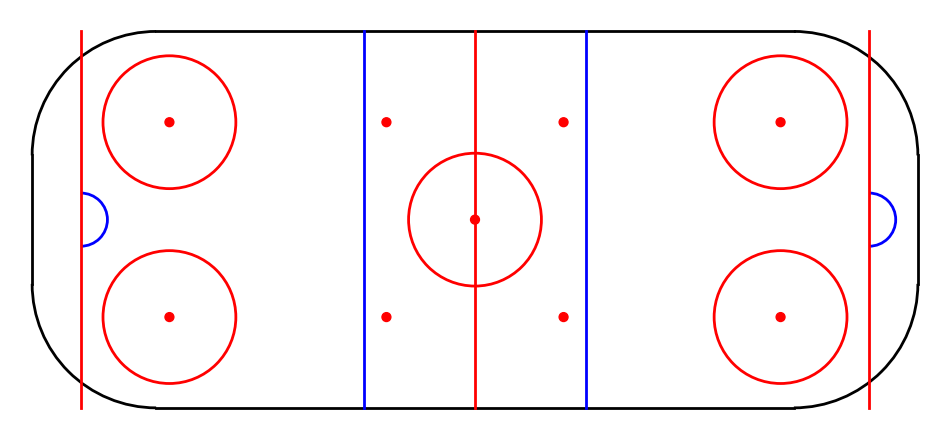

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle, Arc

def draw_hockey_rink():
    fig, ax = plt.subplots(figsize=(12, 6))

    # NHL rink dimensions (feet)
    rink_length = 200
    rink_width = 85
    corner_radius = 28

    # Center the rink at (0,0)
    ax.set_xlim(-rink_length/2 - 5, rink_length/2 + 5)
    ax.set_ylim(-rink_width/2 - 5, rink_width/2 + 5)

    # ----- Rink outline with rounded corners -----
    # Top & bottom straight sides
    ax.plot([-rink_length/2 + corner_radius, rink_length/2 - corner_radius],
            [rink_width/2, rink_width/2], color="black", linewidth=2)
    ax.plot([-rink_length/2 + corner_radius, rink_length/2 - corner_radius],
            [-rink_width/2, -rink_width/2], color="black", linewidth=2)

    # Left & right straight sides
    ax.plot([-rink_length/2, -rink_length/2],
            [-rink_width/2 + corner_radius, rink_width/2 - corner_radius],
            color="black", linewidth=2)
    ax.plot([rink_length/2, rink_length/2],
            [-rink_width/2 + corner_radius, rink_width/2 - corner_radius],
            color="black", linewidth=2)

    # 4 corner arcs
    corners = [(-rink_length/2+corner_radius, rink_width/2-corner_radius, 90, 180),
               (rink_length/2-corner_radius, rink_width/2-corner_radius, 0, 90),
               (-rink_length/2+corner_radius, -rink_width/2+corner_radius, 180, 270),
               (rink_length/2-corner_radius, -rink_width/2+corner_radius, 270, 360)]
    for (x, y, t1, t2) in corners:
        arc = Arc((x, y), 2*corner_radius, 2*corner_radius,
                  theta1=t1, theta2=t2, linewidth=2, color="black")
        ax.add_patch(arc)

    # ----- Lines -----
    ax.plot([0, 0], [-rink_width/2, rink_width/2], color="red", linewidth=2)  # Center line
    for x in [-25, 25]:  # Blue lines
        ax.plot([x, x], [-rink_width/2, rink_width/2], color="blue", linewidth=2)
    for x in [rink_length/2 - 11, -rink_length/2 + 11]:  # Goal lines
        ax.plot([x, x], [-rink_width/2, rink_width/2], color="red", linewidth=2)

    # ----- Circles -----
    center_circle = Circle((0, 0), 15, edgecolor="red", facecolor="none", linewidth=2)
    ax.add_patch(center_circle)

    faceoff_x = [69, -69]  # offensive zones
    faceoff_y = [22, -22]
    for x in faceoff_x:
        for y in faceoff_y:
            ax.add_patch(Circle((x, y), 15, edgecolor="red", facecolor="none", linewidth=2))

    # ----- Crease arcs -----
    for x in [rink_length/2 - 11, -rink_length/2 + 11]:
        crease = Arc((x, 0), 12, 12, theta1=270, theta2=90,
                     linewidth=2, edgecolor="blue")
        ax.add_patch(crease)

    # ----- Faceoff dots -----
    dots = []
    # Center dot
    dots.append((0, 0))
    # Neutral zone dots
    for x in [-20, 20]:
        for y in [-22, 22]:
            dots.append((x, y))
    # Offensive zone dots (inside circles)
    for x in faceoff_x:
        for y in faceoff_y:
            dots.append((x, y))

    for (x, y) in dots:
        ax.add_patch(Circle((x, y), 1, color="red"))

    # ----- Log features with Pandas -----
    features = pd.DataFrame(dots, columns=["X", "Y"])
    print("Faceoff dots:")
    print(features)

    # ----- Display -----
    ax.axis("off")
    ax.set_aspect("equal")
    plt.show()

draw_hockey_rink()
